## Kmeans Animation

This notebook is a demonstration of the **k-means** algorithm.

This notebook was adopted from [Frolian's blog](https://flothesof.github.io/k-means-numpy.html)

In [1]:
# necessary imports
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from IPython.display import HTML

from matplotlib import animation
cmap = cm.get_cmap('Set1') # Colour map (there are many others)

Populating the interactive namespace from numpy and matplotlib


## Data

$$X=\{\vec{x}_1,\vec{x}_2,\ldots,\vec{x}_n\}$$
generated here using a mixture of three spherical gaussians.

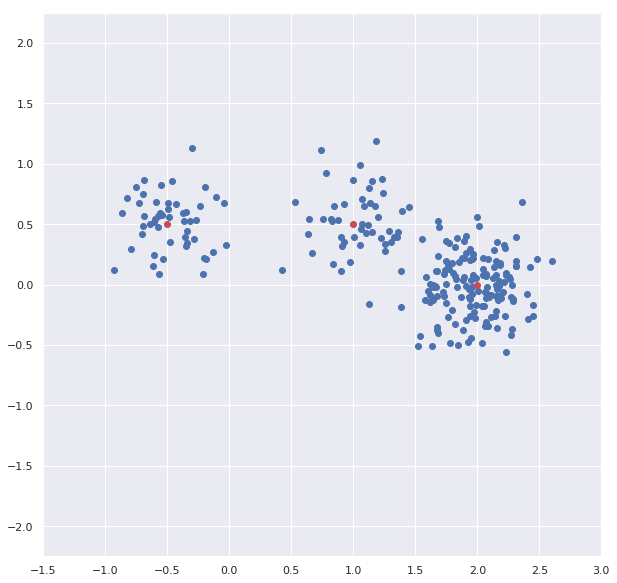

In [2]:
figure(figsize=[10,10])
true_centroids=np.array([[2,0],[1,0.5],[-0.5,0.5]])
true_centroids

points = np.vstack(((np.random.randn(150, 2) * 0.25 + true_centroids[0,:]),
                  (np.random.randn(50, 2) * 0.25 + true_centroids[1,:]),
                  (np.random.randn(50, 2) * 0.25 + true_centroids[2,:])))
scatter(points[:,0],points[:,1]);
scatter(true_centroids[:,0],true_centroids[:,1],c='r')
xlim([-1.5,3]);
ylim([-2.25,2.25]);

### Initialize centroids

$$C=\{\vec{c}_1,\vec{c}_2,\ldots,\vec{c}_k\}$$

By selecting $k$ elements at random from the data set $X$

In [3]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

##  The two-step K-mean algorithm

Each iteration of the $K$-means algorithm consists of two steps:
1. Associate each point $\vec{x} \in X$ to the closest center: $\vec{x} \in C_i$ where $\mbox{argmin}_i \|\vec{x} - \vec{c}_i\|_2$
2. Update each centroid to be the mean of the points in $X$ that were assigned to it:
$$ \vec{c}'_i  = \frac{1}{m} \sum_{\vec{x} \in C_i} \vec{x}$$

In [4]:
#step 1
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

#step 2
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

def compute_error(points,closest,centroids):
    """ returns the RMS of the distance to the closest centroid"""
    return sqrt(mean(((points-centroids[closest,:])**2)))

## K-means in action


Populating the interactive namespace from numpy and matplotlib


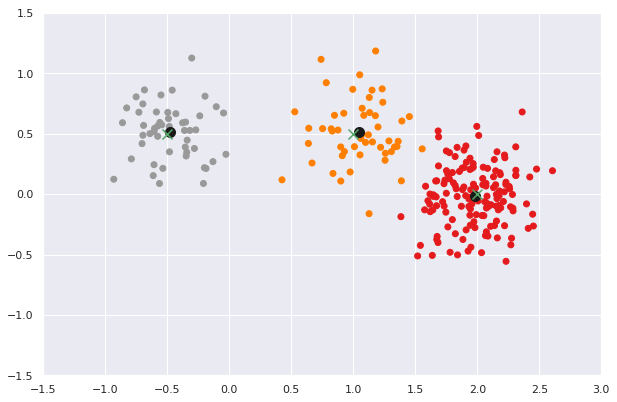

In [5]:
%pylab inline
# create a simple animation

fig = plt.figure(figsize=[10,20./3])
#ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
ax = plt.axes()

centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    error=compute_error(points, closest, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    #print(i,error)
    ax.scatter(points[:, 0], points[:, 1], c=closest,cmap=cmap)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='k', s=100)
    ax.scatter(true_centroids[:,0],true_centroids[:,1],marker='x',c='g',s=100)
    ax.set_xlim([-1.5,3]);
    ax.set_ylim([-1.5,1.5]);
    return

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=10, interval=200)
HTML(ani.to_jshtml())

## Summary

* K-means an algorithm whose goal is to find the center of clusters.
* Next: The Theory behind K-means
